<a href="https://colab.research.google.com/github/luongdiem2005/movie-ratings-analysis/blob/main/notebook/p7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Number of users: 610
Number of movies: 9724
Number of ratings: 100836


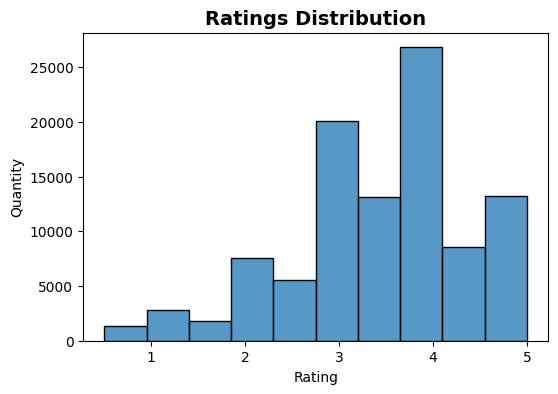

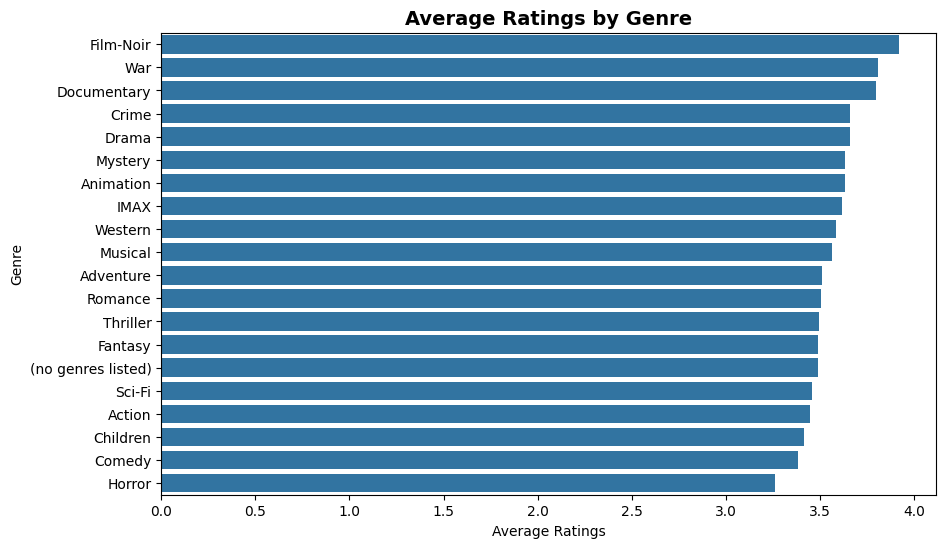

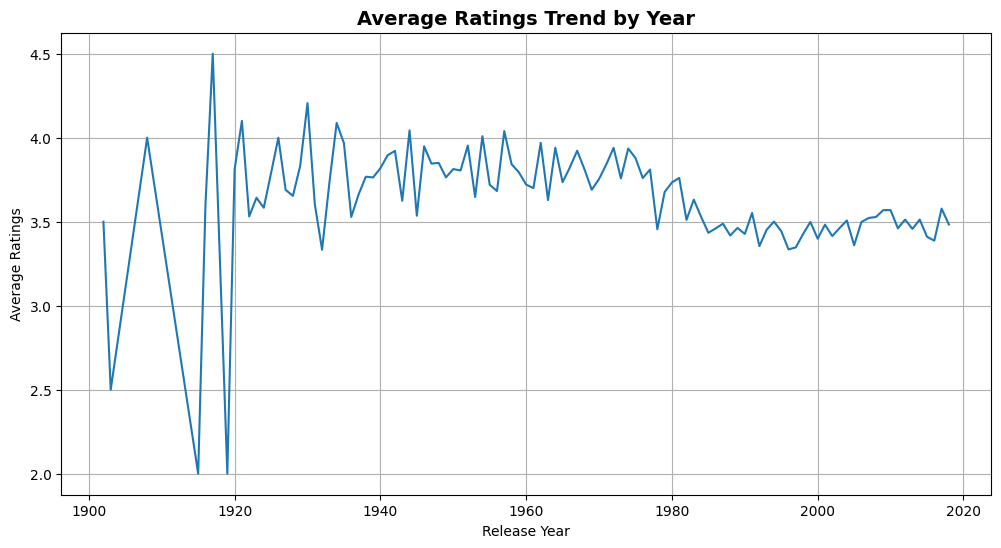

Top 10 most popular movies: 
                                                mean  count
movieId title                                              
356     Forrest Gump                        4.164134    329
318     Shawshank Redemption, The           4.429022    317
296     Pulp Fiction                        4.197068    307
593     Silence of the Lambs, The           4.161290    279
2571    Matrix, The                         4.192446    278
260     Star Wars: Episode IV - A New Hope  4.231076    251
480     Jurassic Park                       3.750000    238
110     Braveheart                          4.031646    237
589     Terminator 2: Judgment Day          3.970982    224
527     Schindler's List                    4.225000    220

Top 10 highest rated movies (at least 200 ratings):
                                                                mean  count
movieId title                                                              
318     Shawshank Redemption, The             

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
base = "/content/drive/MyDrive/projects/movie-ratings-analysis"
movies = pd.read_csv(f"{base}/data/clean_movies.csv")
movies['year'] = movies['year'].astype('Int64')
ratings = pd.read_csv(f"{base}/data/clean_ratings.csv")

df = ratings.merge(movies, on="movieId")
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
n_ratings = ratings.shape[0]
print(f"\nNumber of users: {n_users}")
print(f"Number of movies: {n_movies}")
print(f"Number of ratings: {n_ratings}")

plt.figure(figsize=(6,4))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title("Ratings Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

df['genres'] = df['genres'].str.split('|')
genre_ratings = df.explode('genres').groupby('genres')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index)
plt.title("Average Ratings by Genre", fontsize=14, fontweight="bold")
plt.xlabel("Average Ratings")
plt.ylabel("Genre")
plt.show()

yearly_ratings = df.groupby('year')['rating'].mean().dropna()
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values)
plt.title("Average Ratings Trend by Year", fontsize=14, fontweight="bold")
plt.xlabel("Release Year")
plt.ylabel("Average Ratings")
plt.grid(True)
plt.show()

movie_stats = df.groupby(['movieId','title'])['rating'].agg(['mean','count'])
top_popular = movie_stats.sort_values('count', ascending=False).head(10)
top_highest = movie_stats[movie_stats['count'] >= 200].sort_values('mean', ascending=False).head(10)
print("Top 10 most popular movies: ")
print(top_popular.head(10))
print("\nTop 10 highest rated movies (at least 200 ratings):")
print(top_highest.head(10))

genre_ratings.to_csv(f"{base}/results/genre_avg_rating.csv")
yearly_ratings.to_csv(f"{base}/results/yearly_avg_rating.csv")
movie_stats.to_csv(f"{base}/results/movie_stats.csv")
